# Comparison analysis

In this notebook we compare our methods with the CleanLab methods for error detection. Firstly, we compare the results on the synthetic datasets, and then we check the performance on Wine Quality dataset.

In [1]:
from synthetic_generation import RankingDataset
from order_based_detection import detect_noisy_labels
import cleanlab
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import copy
from xgboost import XGBClassifier

Below, we compare the results of our method using the ground-truth ordering of the dataset with standard CleanLab pipeline using Logistic Regression as the predictive model.

In [2]:
our_accs = []
our_precs = []
our_recs = []

cl_accs = []
cl_precs = []
cl_recs = []
for i in range(16):
    rd = RankingDataset()
    data, true, noisy = rd.generate_clusters()
    true = np.array(true)
    noisy = np.array(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    model = LogisticRegression
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")

    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print("\n")
    our_accs.append(acc)
    our_precs.append(prec)
    our_recs.append(rec)
    cl_accs.append(cl_acc)
    cl_precs.append(cl_prec)
    cl_recs.append(cl_rec)

C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.928
PREC: 0.6666666666666666
REC: 0.56
CL method:
ACC: 0.908
PREC: 0.8
REC: 0.5263157894736842




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.932
PREC: 0.6666666666666666
REC: 0.64
CL method:
ACC: 0.936
PREC: 0.8
REC: 0.6451612903225806




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.88
PREC: 0.42857142857142855
REC: 0.6
CL method:
ACC: 0.8
PREC: 0.76
REC: 0.30158730158730157




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.74
PREC: 0.1875
REC: 0.48
CL method:
ACC: 0.684
PREC: 0.76
REC: 0.20652173913043478




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.88
PREC: 0.43902439024390244
REC: 0.72
CL method:
ACC: 0.832
PREC: 0.8
REC: 0.3508771929824561




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.936
PREC: 0.8461538461538461
REC: 0.44
CL method:
ACC: 0.964
PREC: 0.64
REC: 1.0




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.948
PREC: 0.875
REC: 0.56
CL method:
ACC: 0.932
PREC: 0.88
REC: 0.6111111111111112




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.792
PREC: 0.2545454545454545
REC: 0.56
CL method:
ACC: 0.744
PREC: 0.68
REC: 0.2328767123287671




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.936
PREC: 0.7142857142857143
REC: 0.6
CL method:
ACC: 0.856
PREC: 0.76
REC: 0.3877551020408163




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.916
PREC: 0.6111111111111112
REC: 0.44
CL method:
ACC: 0.816
PREC: 0.84
REC: 0.3333333333333333




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.948
PREC: 0.9285714285714286
REC: 0.52
CL method:
ACC: 0.98
PREC: 0.84
REC: 0.9545454545454546




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.804
PREC: 0.21428571428571427
REC: 0.36
CL method:
ACC: 0.784
PREC: 0.76
REC: 0.2835820895522388




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.912
PREC: 0.5555555555555556
REC: 0.6
CL method:
ACC: 0.948
PREC: 0.92
REC: 0.6764705882352942




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.844
PREC: 0.3157894736842105
REC: 0.48
CL method:
ACC: 0.8
PREC: 0.72
REC: 0.29508196721311475




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.832
PREC: 0.3111111111111111
REC: 0.56
CL method:
ACC: 0.796
PREC: 0.72
REC: 0.2903225806451613




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.924
PREC: 0.6
REC: 0.72
CL method:
ACC: 0.908
PREC: 0.92
REC: 0.5227272727272727




For two-dimensional data with five clusters, we obtain, on average, slightly higher accuracy and higher recall, but lower precision.

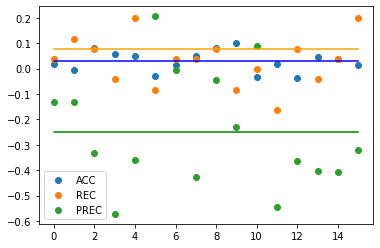

In [16]:
plt.scatter(np.arange(16), np.array(our_accs)-np.array(cl_accs), label="ACC")
plt.scatter(np.arange(16), np.array(our_recs)-np.array(cl_rec), label="REC")
plt.scatter(np.arange(16), np.array(our_precs)-np.array(cl_precs), label="PREC")
plt.plot([0, 15], [np.mean(our_accs)-np.mean(cl_accs)] * 2, c="blue")
plt.plot([0, 15], [np.mean(our_recs)-np.mean(cl_recs)] * 2, c="orange")
plt.plot([0, 15], [np.mean(our_precs)-np.mean(cl_precs)] * 2, c="green")
plt.legend()
plt.show()

In [17]:
our_accs = []
our_precs = []
our_recs = []

cl_accs = []
cl_precs = []
cl_recs = []
for i in range(16):
    rd = RankingDataset(num_dimensions=5, num_clusters=10)
    data, true, noisy = rd.generate_clusters()
    true = np.array(true)
    noisy = np.array(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    model = LogisticRegression
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")

    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print("\n")
    our_accs.append(acc)
    our_precs.append(prec)
    our_recs.append(rec)
    cl_accs.append(cl_acc)
    cl_precs.append(cl_prec)
    cl_recs.append(cl_rec)

C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.718
PREC: 0.20261437908496732
REC: 0.62
CL method:
ACC: 0.718
PREC: 0.76
REC: 0.2275449101796407




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.85
PREC: 0.3711340206185567
REC: 0.72
CL method:
ACC: 0.818
PREC: 0.72
REC: 0.3185840707964602




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.794
PREC: 0.26548672566371684
REC: 0.6
CL method:
ACC: 0.74
PREC: 0.82
REC: 0.25308641975308643




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.764
PREC: 0.23846153846153847
REC: 0.62
CL method:
ACC: 0.7
PREC: 0.76
REC: 0.2159090909090909




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.818
PREC: 0.29292929292929293
REC: 0.58
CL method:
ACC: 0.744
PREC: 0.78
REC: 0.25




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.846
PREC: 0.3548387096774194
REC: 0.66
CL method:
ACC: 0.764
PREC: 0.82
REC: 0.2733333333333333




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.706
PREC: 0.1870967741935484
REC: 0.58
CL method:
ACC: 0.688
PREC: 0.72
REC: 0.20224719101123595




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.84
PREC: 0.3404255319148936
REC: 0.64
CL method:
ACC: 0.832
PREC: 0.84
REC: 0.3559322033898305




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.866
PREC: 0.39759036144578314
REC: 0.66
CL method:
ACC: 0.812
PREC: 0.82
REC: 0.3253968253968254




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Our method:
ACC: 0.752
PREC: 0.19672131147540983
REC: 0.48
CL method:
ACC: 0.784
PREC: 0.72
REC: 0.27692307692307694




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.886
PREC: 0.4507042253521127
REC: 0.64
CL method:
ACC: 0.816
PREC: 0.68
REC: 0.3090909090909091




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.8
PREC: 0.26851851851851855
REC: 0.58
CL method:
ACC: 0.786
PREC: 0.92
REC: 0.3087248322147651




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.836
PREC: 0.3490566037735849
REC: 0.74
CL method:
ACC: 0.734
PREC: 0.72
REC: 0.23225806451612904




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.866
PREC: 0.39759036144578314
REC: 0.66
CL method:
ACC: 0.846
PREC: 0.82
REC: 0.3761467889908257




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.79
PREC: 0.2689075630252101
REC: 0.64
CL method:
ACC: 0.784
PREC: 0.84
REC: 0.29577464788732394




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.784
PREC: 0.2542372881355932
REC: 0.6
CL method:
ACC: 0.768
PREC: 0.68
REC: 0.2537313432835821




When we increase the dimensionality of the data, the differences in recall and precision increase, i.e., we find more errors, but we classify more proper labels as errors.

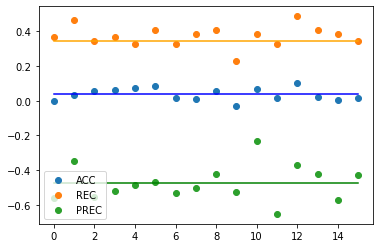

In [19]:
plt.scatter(np.arange(16), np.array(our_accs)-np.array(cl_accs), label="ACC")
plt.scatter(np.arange(16), np.array(our_recs)-np.array(cl_rec), label="REC")
plt.scatter(np.arange(16), np.array(our_precs)-np.array(cl_precs), label="PREC")
plt.plot([0, 15], [np.mean(our_accs)-np.mean(cl_accs)] * 2, c="blue")
plt.plot([0, 15], [np.mean(our_recs)-np.mean(cl_recs)] * 2, c="orange")
plt.plot([0, 15], [np.mean(our_precs)-np.mean(cl_precs)] * 2, c="green")
plt.legend()
plt.show()

In [20]:
our_accs = []
our_precs = []
our_recs = []

cl_accs = []
cl_precs = []
cl_recs = []
for i in range(16):
    rd = RankingDataset(num_dimensions=5, num_clusters=10, shape=lambda x: (5*x)**2)
    data, true, noisy = rd.generate_clusters()
    true = np.array(true)
    noisy = np.array(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    model = LogisticRegression
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")

    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print("\n")
    our_accs.append(acc)
    our_precs.append(prec)
    our_recs.append(rec)
    cl_accs.append(cl_acc)
    cl_precs.append(cl_prec)
    cl_recs.append(cl_rec)

C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.818
PREC: 0.308411214953271
REC: 0.66
CL method:
ACC: 0.742
PREC: 0.76
REC: 0.24516129032258063




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.978
PREC: 0.9333333333333333
REC: 0.84
CL method:
ACC: 0.784
PREC: 0.86
REC: 0.2986111111111111




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.894
PREC: 0.48148148148148145
REC: 0.78
CL method:
ACC: 0.596
PREC: 0.6
REC: 0.14150943396226415




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.976
PREC: 0.9523809523809523
REC: 0.8
CL method:
ACC: 0.718
PREC: 0.78
REC: 0.23076923076923078




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.894
PREC: 0.4823529411764706
REC: 0.82
CL method:
ACC: 0.742
PREC: 0.76
REC: 0.24516129032258063




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.98
PREC: 1.0
REC: 0.8
CL method:
ACC: 0.856
PREC: 0.72
REC: 0.3829787234042553




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.98
PREC: 1.0
REC: 0.8
CL method:
ACC: 0.78
PREC: 0.78
REC: 0.2826086956521739




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.926
PREC: 0.6
REC: 0.78
CL method:
ACC: 0.646
PREC: 0.56
REC: 0.15300546448087432




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.982
PREC: 1.0
REC: 0.82
CL method:
ACC: 0.742
PREC: 0.76
REC: 0.24516129032258063




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Our method:
ACC: 0.918
PREC: 0.5714285714285714
REC: 0.72
CL method:
ACC: 0.69
PREC: 0.72
REC: 0.2033898305084746




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.87
PREC: 0.41935483870967744
REC: 0.78
CL method:
ACC: 0.628
PREC: 0.64
REC: 0.16




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.906
PREC: 0.5194805194805194
REC: 0.8
CL method:
ACC: 0.676
PREC: 0.76
REC: 0.20212765957446807




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.98
PREC: 0.9761904761904762
REC: 0.82
CL method:
ACC: 0.644
PREC: 0.68
REC: 0.17346938775510204




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.878
PREC: 0.4367816091954023
REC: 0.76
CL method:
ACC: 0.63
PREC: 0.76
REC: 0.18009478672985782




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.982
PREC: 1.0
REC: 0.82
CL method:
ACC: 0.652
PREC: 0.68
REC: 0.17708333333333334




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Our method:
ACC: 0.988
PREC: 1.0
REC: 0.88
CL method:
ACC: 0.71
PREC: 0.58
REC: 0.1895424836601307




However, when the data begins to begin non-linear, i.e., it is more difficult to infer the ranking from linear dependences, our solution significantly outperforms the CleanLab solution. We obtain much higher recall and accuracy, which the same average level of precision.

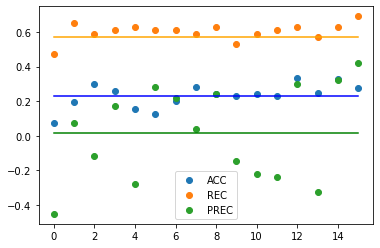

In [21]:
plt.scatter(np.arange(16), np.array(our_accs)-np.array(cl_accs), label="ACC")
plt.scatter(np.arange(16), np.array(our_recs)-np.array(cl_rec), label="REC")
plt.scatter(np.arange(16), np.array(our_precs)-np.array(cl_precs), label="PREC")
plt.plot([0, 15], [np.mean(our_accs)-np.mean(cl_accs)] * 2, c="blue")
plt.plot([0, 15], [np.mean(our_recs)-np.mean(cl_recs)] * 2, c="orange")
plt.plot([0, 15], [np.mean(our_precs)-np.mean(cl_precs)] * 2, c="green")
plt.legend()
plt.show()

In [22]:
s = lambda x: np.random.randint(2, 3)*x

In [34]:
our_accs = []
our_precs = []
our_recs = []

cl_accs = []
cl_precs = []
cl_recs = []
pds = []
for i in range(30):
    rd = RankingDataset(num_dimensions=np.random.randint(2, 21),
                        num_clusters=np.random.randint(3, 11),
                        shape=lambda x: (np.random.randint(1, 10)*x)**np.random.randint(2, 5))
    data, true, noisy = rd.generate_clusters()
    true = np.array(true)
    noisy = np.array(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    temp_model = LogisticRegression()
    temp_model.fit(data, noisy)
    preds = temp_model.predict(data)
    overtrain_acc = (preds == noisy).sum()/len(noisy)
    
    model = LogisticRegression
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    print("Model acc:")
    print(overtrain_acc)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")

    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print("\n")
    df = pd.DataFrame({"our_acc": [acc],
                      "our_rec": [rec],
                      "our_prec": [prec],
                      "cl_acc": [cl_acc],
                      "cl_prec": [cl_prec],
                      "cl_rec": [cl_rec],
                      "model_acc": [overtrain_acc]})
    pds.append(df)
final_df = pd.concat(pds, ignore_index=True)
print(final_df)
    

C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.32
Our method:
ACC: 0.6266666666666667
PREC: 0.1693548387096774
REC: 0.7
CL method:
ACC: 0.5633333333333334
PREC: 0.6333333333333333
REC: 0.1366906474820144




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.184
Our method:
ACC: 0.852
PREC: 0.38461538461538464
REC: 0.8
CL method:
ACC: 0.598
PREC: 0.6
REC: 0.14218009478672985




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.24
Our method:
ACC: 0.97
PREC: 1.0
REC: 0.7
CL method:
ACC: 0.77
PREC: 0.6
REC: 0.24




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.7133333333333334
Our method:
ACC: 0.9333333333333333
PREC: 1.0
REC: 0.3333333333333333
CL method:
ACC: 0.7466666666666667
PREC: 0.6666666666666666
REC: 0.23255813953488372




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.82
Our method:
ACC: 0.9366666666666666
PREC: 0.6666666666666666
REC: 0.7333333333333333
CL method:
ACC: 0.9133333333333333
PREC: 1.0
REC: 0.5357142857142857




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.20666666666666667
Our method:
ACC: 0.9844444444444445
PREC: 1.0
REC: 0.8444444444444444
CL method:
ACC: 0.6933333333333334
PREC: 0.7111111111111111
REC: 0.20382165605095542




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.276
Our method:
ACC: 0.966
PREC: 0.9230769230769231
REC: 0.72
CL method:
ACC: 0.668
PREC: 0.7
REC: 0.1881720430107527




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.6371428571428571
Our method:
ACC: 0.8771428571428571
PREC: 0.43548387096774194
REC: 0.7714285714285715
CL method:
ACC: 0.7314285714285714
PREC: 0.6571428571428571
REC: 0.21904761904761905




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.7314285714285714
Our method:
ACC: 0.8571428571428571
PREC: 0.38461538461538464
REC: 0.7142857142857143
CL method:
ACC: 0.7428571428571429
PREC: 0.8
REC: 0.25225225225225223




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.212
Our method:
ACC: 0.828
PREC: 0.3333333333333333
REC: 0.72
CL method:
ACC: 0.768
PREC: 0.56
REC: 0.22950819672131148




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.17
Our method:
ACC: 0.7425
PREC: 0.2558139534883721
REC: 0.825
CL method:
ACC: 0.655
PREC: 0.575
REC: 0.1597222222222222




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.202
Our method:
ACC: 0.982
PREC: 0.9767441860465116
REC: 0.84
CL method:
ACC: 0.778
PREC: 0.76
REC: 0.2773722627737226




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.7133333333333334
Our method:
ACC: 0.9288888888888889
PREC: 0.6065573770491803
REC: 0.8222222222222222
CL method:
ACC: 0.7088888888888889
PREC: 0.7111111111111111
REC: 0.21333333333333335




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.508
Our method:
ACC: 0.914
PREC: 0.5492957746478874
REC: 0.78
CL method:
ACC: 0.654
PREC: 0.68
REC: 0.17801047120418848




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.192
Our method:
ACC: 0.98
PREC: 0.9761904761904762
REC: 0.82
CL method:
ACC: 0.766
PREC: 0.6
REC: 0.23622047244094488




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.9
Our method:
ACC: 0.9533333333333334
PREC: 1.0
REC: 0.5333333333333333
CL method:
ACC: 0.9866666666666667
PREC: 0.8666666666666667
REC: 1.0




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.73
Our method:
ACC: 0.845
PREC: 0.35135135135135137
REC: 0.65
CL method:
ACC: 0.77
PREC: 0.8
REC: 0.27586206896551724




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.208
Our method:
ACC: 0.878
PREC: 0.43956043956043955
REC: 0.8
CL method:
ACC: 0.646
PREC: 0.5
REC: 0.14124293785310735




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.2725
Our method:
ACC: 0.6175
PREC: 0.16167664670658682
REC: 0.675
CL method:
ACC: 0.635
PREC: 0.725
REC: 0.17682926829268292




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.9
Our method:
ACC: 0.96
PREC: 1.0
REC: 0.6
CL method:
ACC: 0.995
PREC: 0.95
REC: 1.0




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.22444444444444445
Our method:
ACC: 0.9688888888888889
PREC: 0.8974358974358975
REC: 0.7777777777777778
CL method:
ACC: 0.6733333333333333
PREC: 0.6444444444444445
REC: 0.18125




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.6066666666666667
Our method:
ACC: 0.7533333333333333
PREC: 0.15625
REC: 0.3333333333333333
CL method:
ACC: 0.9133333333333333
PREC: 0.8666666666666667
REC: 0.5416666666666666




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.236
Our method:
ACC: 0.97
PREC: 1.0
REC: 0.7
CL method:
ACC: 0.594
PREC: 0.6
REC: 0.14084507042253522




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.8171428571428572
Our method:
ACC: 0.96
PREC: 0.8620689655172413
REC: 0.7142857142857143
CL method:
ACC: 0.86
PREC: 0.8571428571428571
REC: 0.40540540540540543




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.7285714285714285
Our method:
ACC: 0.88
PREC: 0.4406779661016949
REC: 0.7428571428571429
CL method:
ACC: 0.8085714285714286
PREC: 0.6571428571428571
REC: 0.2948717948717949




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.7533333333333333
Our method:
ACC: 0.96
PREC: 0.8
REC: 0.8
CL method:
ACC: 0.8066666666666666
PREC: 0.8666666666666667
REC: 0.325




C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.37333333333333335
Our method:
ACC: 0.8311111111111111
PREC: 0.3434343434343434
REC: 0.7555555555555555
CL method:
ACC: 0.7311111111111112
PREC: 0.6
REC: 0.2076923076923077




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.9
Our method:
ACC: 0.98
PREC: 1.0
REC: 0.8
CL method:
ACC: 0.996
PREC: 0.96
REC: 1.0




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.764
Our method:
ACC: 0.832
PREC: 0.32653061224489793
REC: 0.64
CL method:
ACC: 0.852
PREC: 1.0
REC: 0.4032258064516129




C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to conve

Model acc:
0.21777777777777776
Our method:
ACC: 0.78
PREC: 0.2786885245901639
REC: 0.7555555555555555
CL method:
ACC: 0.5444444444444444
PREC: 0.5111111111111111
REC: 0.11165048543689321


     our_acc   our_rec  our_prec    cl_acc   cl_prec    cl_rec  model_acc
0   0.626667  0.700000  0.169355  0.563333  0.633333  0.136691   0.320000
1   0.852000  0.800000  0.384615  0.598000  0.600000  0.142180   0.184000
2   0.970000  0.700000  1.000000  0.770000  0.600000  0.240000   0.240000
3   0.933333  0.333333  1.000000  0.746667  0.666667  0.232558   0.713333
4   0.936667  0.733333  0.666667  0.913333  1.000000  0.535714   0.820000
5   0.984444  0.844444  1.000000  0.693333  0.711111  0.203822   0.206667
6   0.966000  0.720000  0.923077  0.668000  0.700000  0.188172   0.276000
7   0.877143  0.771429  0.435484  0.731429  0.657143  0.219048   0.637143
8   0.857143  0.714286  0.384615  0.742857  0.800000  0.252252   0.731429
9   0.828000  0.720000  0.333333  0.768000  0.560000  0.229508   0.2120

We confirm the above results for datasets with various dimensionalities and the order non-linearly dependent on the spatial structure of the data. However, here we observe a slight decrease in precision.

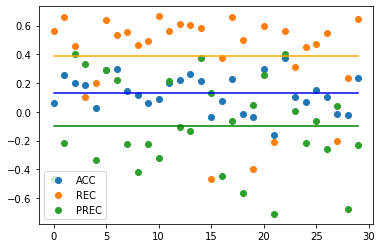

In [36]:
plt.scatter(np.arange(30), np.array(final_df.our_acc)-np.array(final_df.cl_acc), label="ACC")
plt.scatter(np.arange(30), np.array(final_df.our_rec)-np.array(final_df.cl_rec), label="REC")
plt.scatter(np.arange(30), np.array(final_df.our_prec)-np.array(final_df.cl_prec), label="PREC")
plt.plot([0, 29], [np.mean(final_df.our_acc)-np.mean(final_df.cl_acc)] * 2, c="blue")
plt.plot([0, 29], [np.mean(final_df.our_rec)-np.mean(final_df.cl_rec)] * 2, c="orange")
plt.plot([0, 29], [np.mean(final_df.our_prec)-np.mean(final_df.cl_prec)] * 2, c="green")
plt.legend()
plt.show()

The below plot suggests that our model is the suggested solution, especially when fitting the model to the data is challenging. The lower the classification accuracy of the model, the bigger the performance difference between our solution and CleanLab.

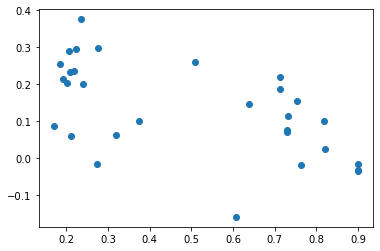

In [38]:
plt.scatter(final_df.model_acc, final_df.our_acc-final_df.cl_acc)

## Wine quality

We proceed to the analysis on the Wine Quality Dataset. We create additional distortions in the (already noisy) labels to obtain ground truth.

In [5]:
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")

In [6]:
conc = pd.concat([df_red, df_white], ignore_index=True)
conc = conc.sample(frac=1)
label_map = {"quality": {i: i-5 for i in range(5, 15)}}
conc = conc.replace(to_replace = label_map)

In [7]:
true_quality = conc.quality
def distort_wine_labels(df, fraction=0.1):
    distorted_df = copy.deepcopy(df)
    quality = df.quality.values
    all_labels = np.unique(quality)
    distorted = np.zeros(df.shape[0])
    for label in all_labels:
        labels_to_choose = np.setdiff1d(all_labels, label)
        temp_df = df[df.quality == label]
        labels = temp_df.quality.values
        ixs_to_distort = np.random.choice(temp_df.index, int(temp_df.shape[0]*fraction), replace=False)
        p = np.abs(labels[0] - labels_to_choose)
        p = np.exp(-p)**2
        p = p/np.sum(p)
        distorted_labels_ixs = np.random.choice(labels_to_choose, len(ixs_to_distort), replace=True, p=p)
        distorted[ixs_to_distort] = 1
        distorted_df.loc[ixs_to_distort, "quality"] = distorted_labels_ixs
    return distorted_df, distorted

In [8]:
ddf, mask = distort_wine_labels(conc)

In [10]:
data = ddf.drop(columns=["quality"]).to_numpy()
noisy = ddf.quality.values
true = conc.quality.values

is_error = np.logical_not(true == noisy).astype(int)
temp_model = LogisticRegression()
temp_model.fit(data, noisy)
preds = temp_model.predict(data)
overtrain_acc = (preds == noisy).sum()/len(noisy)
model = LogisticRegression
cl = cleanlab.classification.CleanLearning(model())
our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model, filter_by="both")
cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
cl_errors = cl_method.astype(int)
cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
cl_acc = np.sum(cl_errors == is_error)/len(is_error)

print("Model acc:")
print(overtrain_acc)
print("Our method:")
print(f"ACC: {acc}")
print(f"PREC: {prec}")
print(f"REC: {rec}")

print("CL method:")
print(f"ACC: {cl_acc}")
print(f"PREC: {cl_prec}")
print(f"REC: {cl_rec}")

C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model acc:
0.44759119593658614
Our method:
ACC: 0.8273049099584423
PREC: 0.2254335260115607
REC: 0.30139103554868624
CL method:
ACC: 0.5887332615053101
PREC: 0.6290571870170015
REC: 0.14336033814723495


Using the Logistic Regression, we obtained much higher accuracy of error detection (83% against 59%) and higher recall. However, we should note that we have much lower precision.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

data = ddf.drop(columns=["quality"]).to_numpy()
noisy = ddf.quality.values
true = conc.quality.values

is_error = np.logical_not(true == noisy).astype(int)
temp_model = XGBClassifier()
temp_model.fit(data, noisy)
preds = temp_model.predict(data)
overtrain_acc = (preds == noisy).sum()/len(noisy)

model = XGBClassifier
cl = cleanlab.classification.CleanLearning(model())
our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model, filter_by="both")
f1 = 2/(1/prec+1/rec)
cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
cl_errors = cl_method.astype(int)
cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
cl_acc = np.sum(cl_errors == is_error)/len(is_error)
cl_f1 = 2/(1/cl_prec+1/cl_rec)

print("Model acc:")
print(overtrain_acc)
print("Our method:")
print(f"ACC: {acc}")
print(f"PREC: {prec}")
print(f"REC: {rec}")
print(f"F1: {f1}")
print("CL method:")
print(f"ACC: {cl_acc}")
print(f"PREC: {cl_prec}")
print(f"REC: {cl_rec}")
print(f"F1: {cl_f1}")

C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9319686008927197
Our method:
ACC: 0.8248422348776359
PREC: 0.2867072111207645
REC: 0.5100463678516228
F1: 0.3670745272525027
CL method:
ACC: 0.6987840541788518
PREC: 0.7434312210200927
REC: 0.21170774647887325
F1: 0.3295649194929771


We can make the same observation as above for a better fitted model, i.e., XGBoost.

In [32]:
our_accs = []
our_precs = []
our_recs = []
f1s = []
cl_accs = []
cl_precs = []
cl_recs = []
cl_f1s = []

clml_accs = []
clml_precs = []
clml_recs = []
clml_f1s = []
pds = []
for i in tqdm(range(1, 10)):
    ddf, mask = distort_wine_labels(conc, fraction=i/20)
    data = ddf.drop(columns=["quality"]).to_numpy()
    noisy = ddf.quality.values
    num_classes = len(np.unique(noisy))
    perm = np.random.shuffle(np.arange(num_classes))
    true = conc.quality.values
    temp_model = XGBClassifier()
    temp_model.fit(data, noisy)
    preds = temp_model.predict(data)
    overtrain_acc = (preds == noisy).sum()/len(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    model = XGBClassifier
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model, filter_by="both")
    f1 = 2/(1/prec+1/rec)
    clml_results, clml_prec, clml_rec, clml_acc = detect_noisy_labels(data, noisy, true, order=perm, model=model, filter_by="both")
    clml_f1 = 2/(1/prec+1/rec)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    cl_f1 = 2/(1/cl_prec+1/cl_rec)
    print("Model acc:")
    print(overtrain_acc)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")
    print(f"F1: {f1}")
    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print(f"F1: {cl_f1}")
    print("CLML method:")
    print(f"ACC: {clml_acc}")
    print(f"PREC: {clml_prec}")
    print(f"REC: {clml_rec}")
    print(f"F1: {clml_f1}")
    df = pd.DataFrame({"our_acc": [acc],
                      "our_rec": [rec],
                      "our_prec": [prec],
                       "our_f1": [f1],
                      "cl_acc": [cl_acc],
                      "cl_prec": [cl_prec],
                      "cl_rec": [cl_rec],
                       "cl_f1": [cl_f1],
                      "clml_acc": [clml_acc],
                      "clml_prec": [clml_prec],
                      "clml_rec": [clml_rec],
                       "clml_f1": [clml_f1],
                      "model_acc": [overtrain_acc]})
    pds.append(df)
final_df = pd.concat(pds, ignore_index=True)
    

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9564414345082346
Our method:
ACC: 0.8390026165922734
PREC: 0.1571969696969697
REC: 0.515527950310559
F1: 0.2409288824383164
CL method:
ACC: 0.7155610281668462
PREC: 0.7577639751552795
REC: 0.1211519364448858
F1: 0.2089041095890411
CLML method:
ACC: 0.8402339541326767
PREC: 0.16162570888468808
REC: 0.531055900621118
F1: 0.2409288824383164


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9376635370170848
Our method:
ACC: 0.8200708019085732
PREC: 0.2742214532871972
REC: 0.4899536321483771
F1: 0.35163616195230163
CL method:
ACC: 0.6997075573341542
PREC: 0.7666151468315301
REC: 0.21602787456445993
F1: 0.33707101597009853
CLML method:
ACC: 0.8293058334615977
PREC: 0.28650646950092423
REC: 0.47913446676970634
F1: 0.35163616195230163


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9144220409419732
Our method:
ACC: 0.7934431275973526
PREC: 0.3493485342019544
REC: 0.44135802469135804
F1: 0.39
CL method:
ACC: 0.6886255194705249
PREC: 0.7366255144032922
REC: 0.28836085380588
F1: 0.4144717800289436
CLML method:
ACC: 0.8002154840695705
PREC: 0.3683360258481422
REC: 0.4691358024691358
F1: 0.39


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9042635062336463
Our method:
ACC: 0.7815915037709712
PREC: 0.45314900153609833
REC: 0.4548959136468774
F1: 0.4540207772220084
CL method:
ACC: 0.6803139910728029
PREC: 0.7393986121819583
REC: 0.3554484803558191
F1: 0.48010012515644557
CLML method:
ACC: 0.7709712174849931
PREC: 0.43104693140794226
REC: 0.4602929838087895
F1: 0.4540207772220084


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.8784054178851778
Our method:
ACC: 0.7526550715714946
PREC: 0.5054945054945055
REC: 0.4254007398273736
F1: 0.4620020087043857
CL method:
ACC: 0.6687702016315222
PREC: 0.7336621454993835
REC: 0.40893470790378006
F1: 0.5251544571932921
CLML method:
ACC: 0.750192396490688
PREC: 0.49964714184897674
REC: 0.436498150431566
F1: 0.4620020087043857


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.8796367554255811
Our method:
ACC: 0.7160227797444975
PREC: 0.5362526920315865
REC: 0.38386433710174717
F1: 0.4474393530997305
CL method:
ACC: 0.659227335693397
PREC: 0.7127440904419322
REC: 0.4559500328731098
F1: 0.5561347233360064
CLML method:
ACC: 0.7189472064029552
PREC: 0.5426136363636364
REC: 0.3926002055498458
F1: 0.4474393530997305


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.8750192396490688
Our method:
ACC: 0.6963213790980453
PREC: 0.6033172080165861
REC: 0.3842429577464789
F1: 0.4694810432912073
CL method:
ACC: 0.6404494382022472
PREC: 0.6980633802816901
REC: 0.4901112484548826
F1: 0.5758896151053015
CLML method:
ACC: 0.692473449284285
PREC: 0.5883870967741935
REC: 0.4014084507042254
F1: 0.4694810432912073


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.85285516392181
Our method:
ACC: 0.6576881637678929
PREC: 0.6249162759544541
REC: 0.35926068540623796
F1: 0.4562347188264058
CL method:
ACC: 0.6195167000153917
PREC: 0.6700038505968425
REC: 0.518628912071535
F1: 0.5846774193548387
CLML method:
ACC: 0.6649222718177621
PREC: 0.6377952755905512
REC: 0.37427801309202924
F1: 0.4562347188264058


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.8523934123441589
Our method:
ACC: 0.617361859319686
PREC: 0.6535211267605634
REC: 0.31759069130732376
F1: 0.4274527867342239
CL method:
ACC: 0.5991996305987379
PREC: 0.6372347707049966
REC: 0.5466823253082795
F1: 0.588495575221239
CLML method:
ACC: 0.6156687702016316
PREC: 0.649753347427766
REC: 0.31553730321697465
F1: 0.4274527867342239


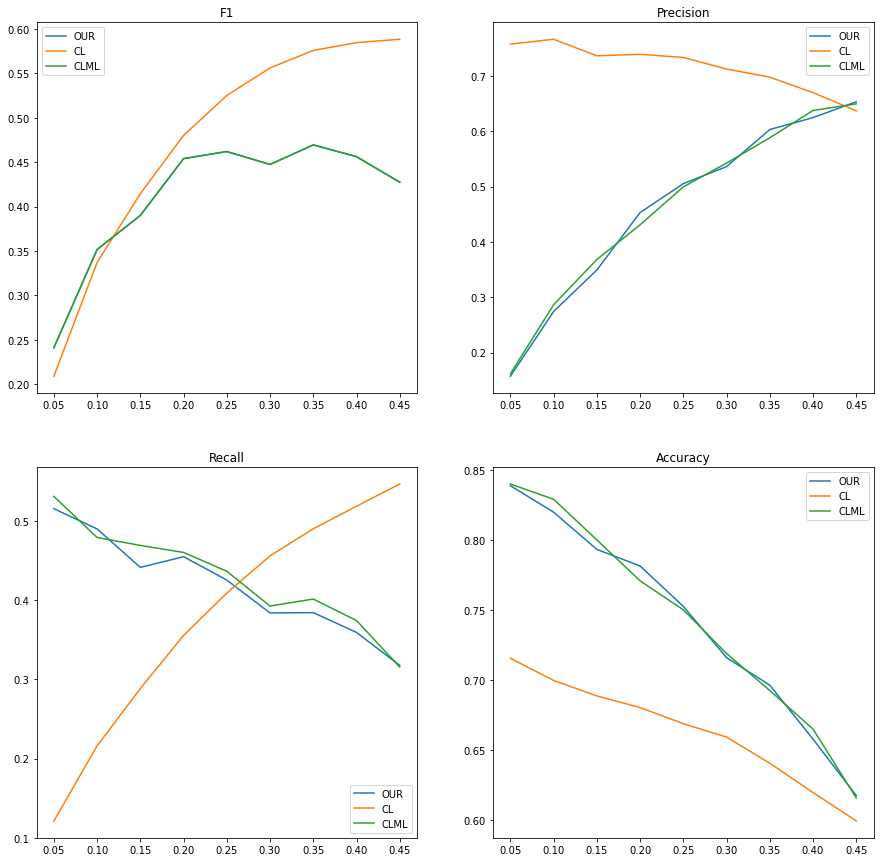

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.our_f1, label="OUR")
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_f1, label="CL")
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_f1, label="CLML")
ax[0][0].legend()
ax[0][0].set_title("F1")

ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.our_prec, label="OUR")
ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_prec, label="CL")
ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_prec, label="CLML")
ax[0][1].legend()
ax[0][1].set_title("Precision")

ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.our_rec, label="OUR")
ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_rec, label="CL")
ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_rec, label="CLML")
ax[1][0].legend()
ax[1][0].set_title("Recall")

ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.our_acc, label="OUR")
ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_acc, label="CL")
ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_acc, label="CLML")
ax[1][1].legend()
ax[1][1].set_title("Accuracy")
plt.show()

The plots above show the change in error detection metrics for the increasing fraction of distorted labels. For low levels of distortion, we achieve much higher accuracy and recall, but much lower precision then the standard CleanLab algorithm. Using our algorithm with a random order of labels, instead of the ground-truth, yielded similar results to our pipeline. However, this seems to be an outlier -- for the synthetic data, the ground-truth order allowed for much better results than a random permutation.

## Cleaned wine

We repeat the same analysis as above, but we clean the Wine dataset with the standard CleanLab pipeline prior to computing the errors.

In [44]:
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")
conc = pd.concat([df_red, df_white], ignore_index=True)
conc = conc.sample(frac=1)
label_map = {"quality": {i: i-5 for i in range(5, 15)}}
conc = conc.replace(to_replace = label_map)
data = conc.drop(columns=["quality"]).to_numpy()
noisy = conc.quality.values

cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
ixs = np.arange(conc.shape[0])[np.logical_not(cl_method)]
conc = conc.loc[ixs]
conc = conc.reset_index()

In [45]:
ddf, mask = distort_wine_labels(conc)

In [46]:
our_accs = []
our_precs = []
our_recs = []
f1s = []
cl_accs = []
cl_precs = []
cl_recs = []
cl_f1s = []

clml_accs = []
clml_precs = []
clml_recs = []
clml_f1s = []
pds = []
for i in tqdm(range(1, 10)):
    ddf, mask = distort_wine_labels(conc, fraction=i/20)
    data = ddf.drop(columns=["quality"]).to_numpy()
    noisy = ddf.quality.values
    num_classes = len(np.unique(noisy))
    perm = np.random.shuffle(np.arange(num_classes))
    true = conc.quality.values
    temp_model = XGBClassifier()
    temp_model.fit(data, noisy)
    preds = temp_model.predict(data)
    overtrain_acc = (preds == noisy).sum()/len(noisy)
    is_error = np.logical_not(true == noisy).astype(int)
    model = XGBClassifier
    cl = cleanlab.classification.CleanLearning(model())
    our_method_results, prec, rec, acc = detect_noisy_labels(data, noisy, true, model=model, filter_by="both")
    f1 = 2/(1/prec+1/rec)
    clml_results, clml_prec, clml_rec, clml_acc = detect_noisy_labels(data, noisy, true, order=perm, model=model, filter_by="both")
    clml_f1 = 2/(1/prec+1/rec)
    cl_method = cl.find_label_issues(data, noisy).is_label_issue.values
    cl_errors = cl_method.astype(int)
    cl_prec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(is_error == 1)[0])
    cl_rec = np.sum(np.logical_and(is_error == 1, cl_errors == 1))/len(np.where(cl_errors == 1)[0])
    cl_acc = np.sum(cl_errors == is_error)/len(is_error)
    cl_f1 = 2/(1/cl_prec+1/cl_rec)
    print("Model acc:")
    print(overtrain_acc)
    print("Our method:")
    print(f"ACC: {acc}")
    print(f"PREC: {prec}")
    print(f"REC: {rec}")
    print(f"F1: {f1}")
    print("CL method:")
    print(f"ACC: {cl_acc}")
    print(f"PREC: {cl_prec}")
    print(f"REC: {cl_rec}")
    print(f"F1: {cl_f1}")
    print("CLML method:")
    print(f"ACC: {clml_acc}")
    print(f"PREC: {clml_prec}")
    print(f"REC: {clml_rec}")
    print(f"F1: {clml_f1}")
    df = pd.DataFrame({"our_acc": [acc],
                      "our_rec": [rec],
                      "our_prec": [prec],
                       "our_f1": [f1],
                      "cl_acc": [cl_acc],
                      "cl_prec": [cl_prec],
                      "cl_rec": [cl_rec],
                       "cl_f1": [cl_f1],
                      "clml_acc": [clml_acc],
                      "clml_prec": [clml_prec],
                      "clml_rec": [clml_rec],
                       "clml_f1": [clml_f1],
                      "model_acc": [overtrain_acc]})
    pds.append(df)
final_df = pd.concat(pds, ignore_index=True)
    

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9845672575599583
Our method:
ACC: 0.8310740354535975
PREC: 0.15458937198067632
REC: 0.5378151260504201
F1: 0.2401500938086304
CL method:
ACC: 0.6976016684045881
PREC: 0.7436974789915967
REC: 0.11302681992337164
F1: 0.19623059866962309
CLML method:
ACC: 0.8412930135557872
PREC: 0.15637319316688567
REC: 0.5
F1: 0.2401500938086304


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9672575599582899
Our method:
ACC: 0.8100104275286757
PREC: 0.25536723163841807
REC: 0.47280334728033474
F1: 0.33162142333088773
CL method:
ACC: 0.6767466110531803
PREC: 0.7343096234309623
REC: 0.19785794813979707
F1: 0.3117229129662522
CLML method:
ACC: 0.8189781021897811
PREC: 0.2639225181598063
REC: 0.4560669456066946
F1: 0.33162142333088773


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9672575599582899
Our method:
ACC: 0.7958289885297185
PREC: 0.35913978494623655
REC: 0.46582984658298465
F1: 0.40558591378263503
CL method:
ACC: 0.67007299270073
PREC: 0.7475592747559274
REC: 0.27671657201858546
F1: 0.40391861341371516
CLML method:
ACC: 0.7899895724713243
PREC: 0.3495850622406639
REC: 0.4700139470013947
F1: 0.40558591378263503


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9576642335766423
Our method:
ACC: 0.7803962460896767
PREC: 0.4474835886214442
REC: 0.42737722048066873
F1: 0.4371993586317478
CL method:
ACC: 0.6715328467153284
PREC: 0.7157784743991641
REC: 0.34456740442655936
F1: 0.46519524617996605
CLML method:
ACC: 0.7764337851929093
PREC: 0.43646408839779005
REC: 0.41274817136886105
F1: 0.4371993586317478


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9474452554744526
Our method:
ACC: 0.7461939520333681
PREC: 0.4903100775193798
REC: 0.4227234753550543
F1: 0.4540152534768954
CL method:
ACC: 0.6492179353493223
PREC: 0.7117794486215538
REC: 0.3892188213796254
F1: 0.5032486709982279
CLML method:
ACC: 0.7520333680917622
PREC: 0.5042643923240938
REC: 0.39515455304928987
F1: 0.4540152534768954


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9401459854014599
Our method:
ACC: 0.7128258602711157
PREC: 0.527306967984934
REC: 0.3902439024390244
F1: 0.4485382458950741
CL method:
ACC: 0.6337851929092805
PREC: 0.6815331010452962
REC: 0.4295125164690382
F1: 0.5269396551724138
CLML method:
ACC: 0.7184567257559958
PREC: 0.540514775977121
REC: 0.3951219512195122
F1: 0.4485382458950741


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9370177267987487
Our method:
ACC: 0.6894681960375391
PREC: 0.5934393638170974
REC: 0.3559928443649374
F1: 0.44502422661200153
CL method:
ACC: 0.6233576642335766
PREC: 0.6821705426356589
REC: 0.4733140256516343
F1: 0.5588666340986811
CLML method:
ACC: 0.6857142857142857
PREC: 0.582046332046332
REC: 0.3595706618962433
F1: 0.44502422661200153


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9295099061522419
Our method:
ACC: 0.6679874869655892
PREC: 0.6511194029850746
REC: 0.36430062630480164
F1: 0.4672021419009371
CL method:
ACC: 0.6206465067778937
PREC: 0.6816283924843424
REC: 0.5192842942345924
F1: 0.5894831866395848
CLML method:
ACC: 0.670281543274244
PREC: 0.65466297322253
REC: 0.37004175365344466
F1: 0.4672021419009371


C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)
C:\Users\lukas\anaconda3\lib\site-packages\cleanlab\filter.py:453: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.asarray(labels)


Model acc:
0.9249217935349322
Our method:
ACC: 0.6239833159541188
PREC: 0.6515021459227468
REC: 0.3520408163265306
F1: 0.45709123757904246
CL method:
ACC: 0.5924921793534932
PREC: 0.6275510204081632
REC: 0.5403354632587859
F1: 0.58068669527897
CLML method:
ACC: 0.6156412930135557
PREC: 0.6563436563436563
REC: 0.3047309833024119
F1: 0.45709123757904246


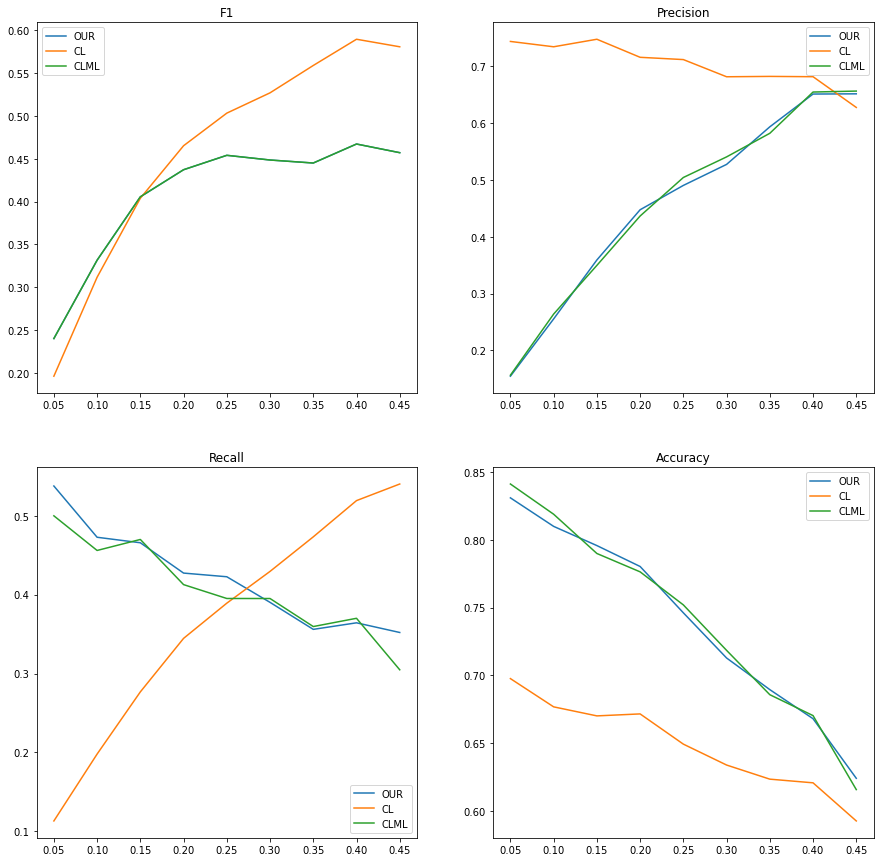

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.our_f1, label="OUR")
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_f1, label="CL")
ax[0][0].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_f1, label="CLML")
ax[0][0].legend()
ax[0][0].set_title("F1")

ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.our_prec, label="OUR")
ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_prec, label="CL")
ax[0][1].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_prec, label="CLML")
ax[0][1].legend()
ax[0][1].set_title("Precision")

ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.our_rec, label="OUR")
ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_rec, label="CL")
ax[1][0].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_rec, label="CLML")
ax[1][0].legend()
ax[1][0].set_title("Recall")

ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.our_acc, label="OUR")
ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.cl_acc, label="CL")
ax[1][1].plot(np.arange(0.05, 0.5, 0.05), final_df.clml_acc, label="CLML")
ax[1][1].legend()
ax[1][1].set_title("Accuracy")
plt.show()

Regardless of the increased classification accuracy of the model, we obtain similar results to the ones before. The trends in F1, accuracy, recall and precision remain the same with respect to the distortion fraction of the labels.